In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/datas/Hotel_clean.csv')

print(f"Shape du dataset : {df.shape}")
print(f"Colonnes : {df.columns.tolist()}")

Shape du dataset : (29999, 31)
Colonnes : ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'booking_status_Not_Canceled']


In [3]:
# Vérification de la variable cible
target_col = 'booking_status_Not_Canceled'
print(f"\n🎯 Distribution de la variable cible '{target_col}' :")
print(f"Non annulé (1) : {(df[target_col] == 1).sum()} ({(df[target_col] == 1).mean()*100:.1f}%)")
print(f"Annulé (0) : {(df[target_col] == 0).sum()} ({(df[target_col] == 0).mean()*100:.1f}%)")


🎯 Distribution de la variable cible 'booking_status_Not_Canceled' :
Non annulé (1) : 20184 (67.3%)
Annulé (0) : 9815 (32.7%)


In [4]:
# Séparation features et target
X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"Nombre de features : {X.shape[1]}")
print(f"Features : {X.columns.tolist()}")

Nombre de features : 30
Features : ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


In [5]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Taille train : {X_train.shape[0]} échantillons")
print(f"Taille test : {X_test.shape[0]} échantillons")

Taille train : 23999 échantillons
Taille test : 6000 échantillons


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Dictionnaire des modèles à tester
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
}

In [8]:
# Stockage des résultats
results = {}
trained_models = {}

In [9]:
for name, model in models.items():
    print(f"\n⏳ Entraînement du modèle : {name}")

    # Utilisation des données normalisées pour SVM et NN
    if name in ['SVM', 'Neural Network']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = model

    print(f"✅ {name} - Accuracy: {accuracy:.3f}, F1: {f1:.3f}, ROC-AUC: {roc_auc:.3f}")


⏳ Entraînement du modèle : Logistic Regression
✅ Logistic Regression - Accuracy: 0.805, F1: 0.860, ROC-AUC: 0.861

⏳ Entraînement du modèle : Random Forest
✅ Random Forest - Accuracy: 0.897, F1: 0.925, ROC-AUC: 0.951

⏳ Entraînement du modèle : Gradient Boosting
✅ Gradient Boosting - Accuracy: 0.853, F1: 0.894, ROC-AUC: 0.914

⏳ Entraînement du modèle : SVM
✅ SVM - Accuracy: 0.837, F1: 0.884, ROC-AUC: 0.896

⏳ Entraînement du modèle : Neural Network
✅ Neural Network - Accuracy: 0.859, F1: 0.898, ROC-AUC: 0.920


In [10]:
# Création du DataFrame de résultats
results_df = pd.DataFrame({
    model: {metric: results[model][metric] for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']}
    for model in results.keys()
}).T

In [11]:
print("\n🏆 TABLEAU DE COMPARAISON :")
print(results_df.round(3))


🏆 TABLEAU DE COMPARAISON :
                     accuracy  precision  recall     f1  roc_auc
Logistic Regression     0.806      0.833   0.889  0.860    0.861
Random Forest           0.898      0.908   0.944  0.925    0.951
Gradient Boosting       0.853      0.868   0.922  0.894    0.914
SVM                     0.837      0.851   0.919  0.884    0.896
Neural Network          0.859      0.876   0.921  0.898    0.920


In [12]:
# Identification du meilleur modèle (basé sur ROC-AUC)
best_model_name = results_df['roc_auc'].idxmax()
print(f"\n🥇 Meilleur modèle : {best_model_name} (ROC-AUC: {results_df.loc[best_model_name, 'roc_auc']:.3f})")


🥇 Meilleur modèle : Random Forest (ROC-AUC: 0.951)


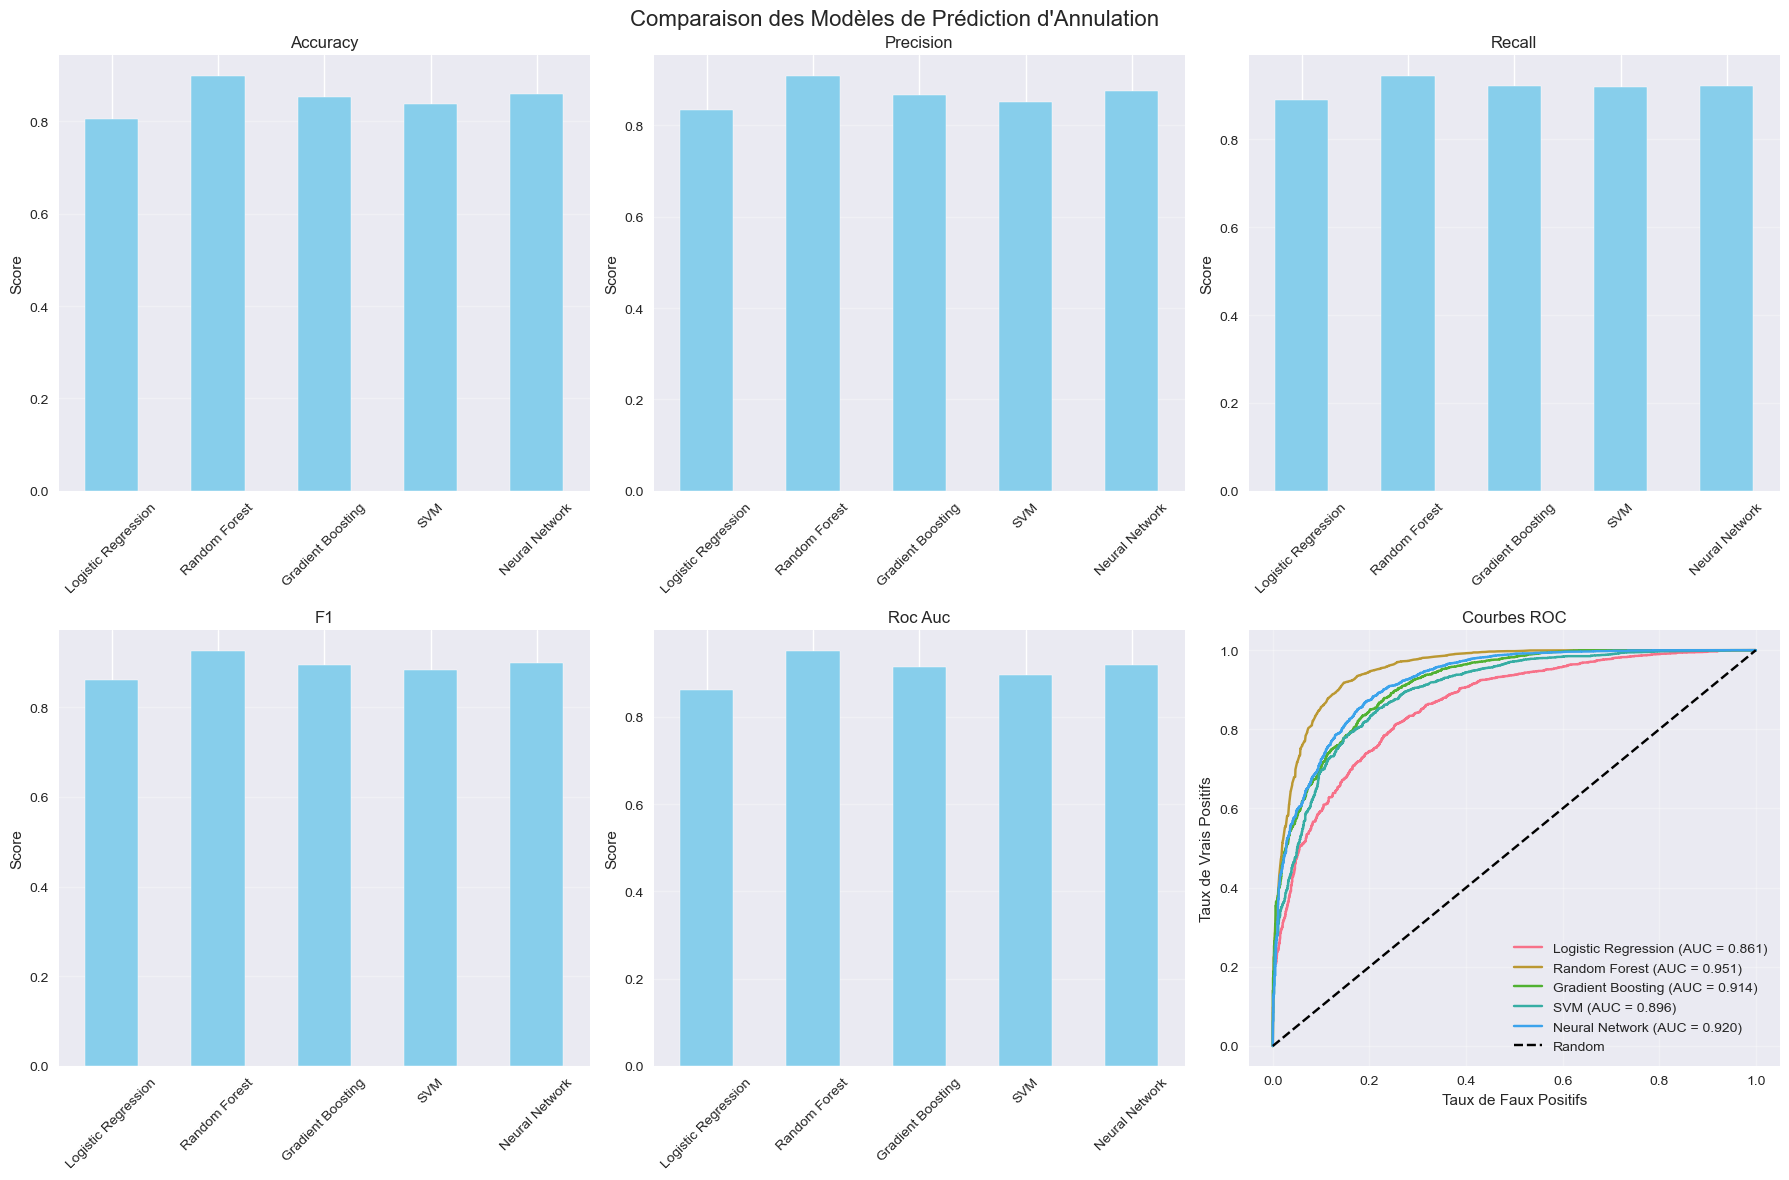

In [14]:
# Graphique de comparaison des métriques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparaison des Modèles de Prédiction d\'Annulation', fontsize=16)

# Graphiques de barres pour chaque métrique
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    results_df[metric].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{metric.replace("_", " ").title()}')
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

    # Courbes ROC
ax = axes[1, 2]
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
    ax.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["roc_auc"]:.3f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('Taux de Faux Positifs')
ax.set_ylabel('Taux de Vrais Positifs')
ax.set_title('Courbes ROC')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

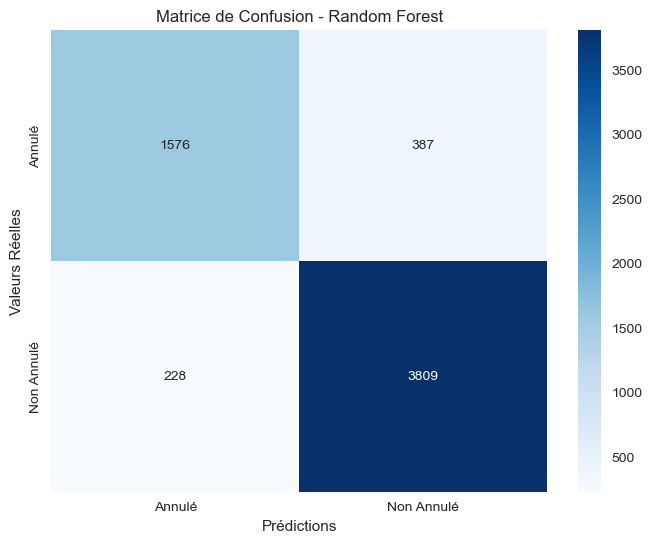

In [15]:
# Matrice de confusion pour le meilleur modèle
plt.figure(figsize=(8, 6))
best_predictions = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Annulé', 'Non Annulé'],
            yticklabels=['Annulé', 'Non Annulé'])
plt.title(f'Matrice de Confusion - {best_model_name}')
plt.ylabel('Valeurs Réelles')
plt.xlabel('Prédictions')
plt.show()

In [16]:
best_model = trained_models[best_model_name]

# Paramètres à optimiser selon le modèle
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
}

if best_model_name in param_grids:
    print(f"🔍 Optimisation des hyperparamètres pour {best_model_name}...")

    # Utilisation de données appropriées
    if best_model_name in ['SVM', 'Neural Network']:
        X_train_opt, X_test_opt = X_train_scaled, X_test_scaled
    else:
        X_train_opt, X_test_opt = X_train, X_test

    grid_search = GridSearchCV(
        models[best_model_name],
        param_grids[best_model_name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    grid_search.fit(X_train_opt, y_train)

    print(f"✅ Meilleurs paramètres : {grid_search.best_params_}")
    print(f"✅ Meilleur score CV : {grid_search.best_score_:.3f}")

    # Évaluation du modèle optimisé
    optimized_model = grid_search.best_estimator_
    y_pred_opt = optimized_model.predict(X_test_opt)
    y_pred_proba_opt = optimized_model.predict_proba(X_test_opt)[:, 1]

    print(f"📊 Performance du modèle optimisé :")
    print(f"   Accuracy: {accuracy_score(y_test, y_pred_opt):.3f}")
    print(f"   F1-Score: {f1_score(y_test, y_pred_opt):.3f}")
    print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_opt):.3f}")

    final_model = optimized_model
else:
    final_model = best_model
    print(f"Pas d'optimisation définie pour {best_model_name}, utilisation du modèle de base.")



🔍 Optimisation des hyperparamètres pour Random Forest...
✅ Meilleurs paramètres : {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
✅ Meilleur score CV : 0.950
📊 Performance du modèle optimisé :
   Accuracy: 0.898
   F1-Score: 0.926
   ROC-AUC: 0.953



🔍 7. IMPORTANCE DES FEATURES

🏆 TOP 10 DES FEATURES LES PLUS IMPORTANTES :
                       feature  importance
5                    lead_time    0.322412
12          avg_price_per_room    0.144496
13      no_of_special_requests    0.120014
7                arrival_month    0.078590
8                 arrival_date    0.076429
3            no_of_week_nights    0.047362
29  market_segment_type_Online    0.035543
2         no_of_weekend_nights    0.034615
6                 arrival_year    0.028239
0                 no_of_adults    0.023070


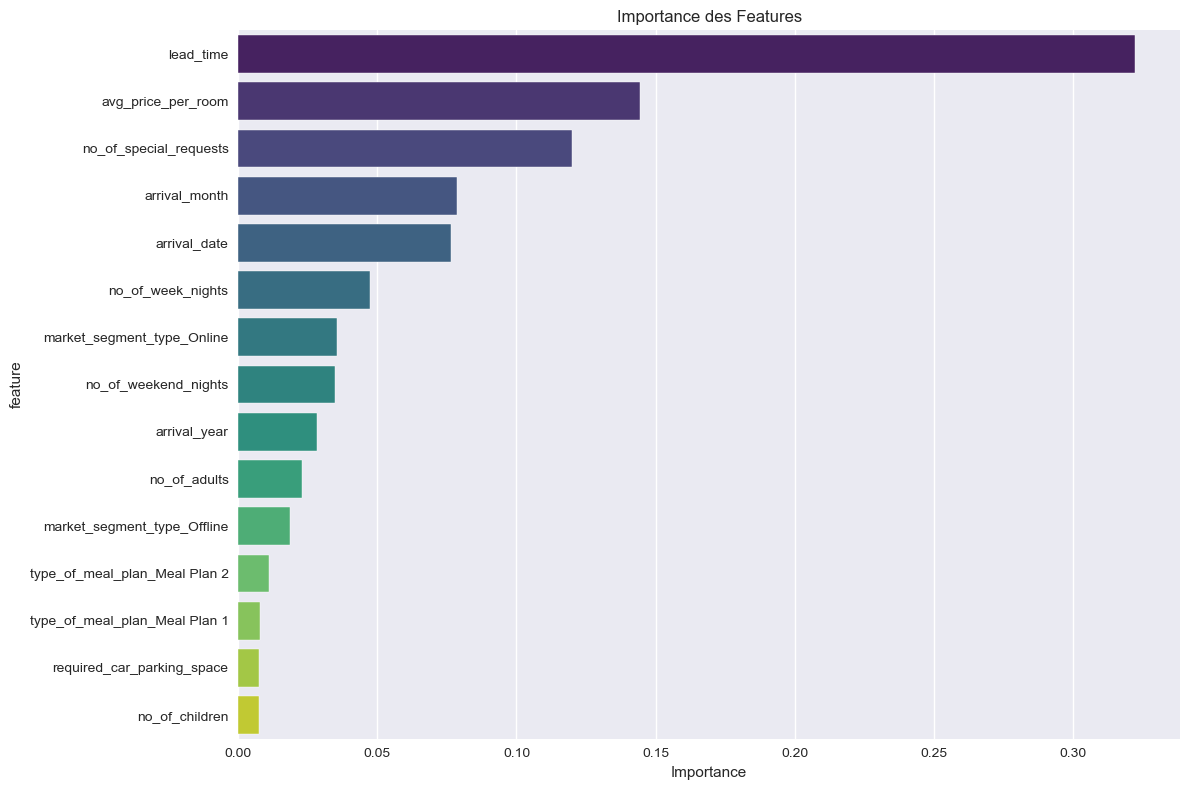

In [17]:
print("\n🔍 7. IMPORTANCE DES FEATURES")

if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n🏆 TOP 10 DES FEATURES LES PLUS IMPORTANTES :")
    print(feature_importance.head(10))

    # Graphique d'importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
    plt.title('Importance des Features')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

In [18]:
# 8. FONCTION DE PRÉDICTION

def predict_cancellation(model, scaler, **kwargs):
    """
    Prédit la probabilité d'annulation pour une nouvelle réservation

    Paramètres principaux :
    - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights
    - lead_time, avg_price_per_room, no_of_special_requests
    - arrival_year, arrival_month, arrival_date
    - repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled
    - required_car_parking_space
    - type_of_meal_plan (Meal Plan 1/2/3, Not Selected)
    - room_type_reserved (Room_Type 1-7)
    - market_segment_type (Aviation, Complementary, Corporate, Offline, Online)
    """

    # Création d'un DataFrame avec toutes les features
    features = pd.DataFrame([kwargs])

    # Vérification que toutes les colonnes sont présentes
    for col in X.columns:
        if col not in features.columns:
            features[col] = 0

    # Réorganisation des colonnes pour correspondre au modèle
    features = features[X.columns]

    # Normalisation si nécessaire
    if best_model_name in ['SVM', 'Neural Network']:
        features_scaled = scaler.transform(features)
        probability = model.predict_proba(features_scaled)[0, 1]
    else:
        probability = model.predict_proba(features)[0, 1]

    return {
        'probability_not_canceled': probability,
        'probability_canceled': 1 - probability,
        'risk_level': 'Élevé' if probability < 0.5 else 'Faible'
    }


🎯 8. FONCTION DE PRÉDICTION


In [24]:
# Exemple d'utilisation
print("\n💡 EXEMPLE DE PRÉDICTION :")
example_prediction = predict_cancellation(
    final_model, scaler,
    no_of_adults=2,
    no_of_children=1,
    no_of_weekend_nights=2,
    no_of_week_nights=3,
    lead_time=30,
    avg_price_per_room=120.0,
    no_of_special_requests=1,
    arrival_year=2024,
    arrival_month=6,
    arrival_date=15,
    repeated_guest=0,
    no_of_previous_cancellations=0,
    no_of_previous_bookings_not_canceled=0,
    required_car_parking_space=1
)

print(f"🎯 Probabilité de NON annulation : {example_prediction['probability_not_canceled']:.1%}")
print(f"🎯 Probabilité d'ANNULATION : {example_prediction['probability_canceled']:.1%}")
print(f"🚨 Niveau de risque : {example_prediction['risk_level']}")


💡 EXEMPLE DE PRÉDICTION :
🎯 Probabilité de NON annulation : 91.1%
🎯 Probabilité d'ANNULATION : 8.9%
🚨 Niveau de risque : Faible


In [25]:
# 9. SAUVEGARDE DU MODÈLE
import joblib

model_path = 'C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/model/'
import os
os.makedirs(model_path, exist_ok=True)

# Sauvegarde du modèle et du scaler
joblib.dump(final_model, f'{model_path}hotel_cancellation_model.pkl')
joblib.dump(scaler, f'{model_path}scaler.pkl')
joblib.dump(X.columns.tolist(), f'{model_path}feature_names.pkl')

print(f"✅ Modèle sauvegardé : {model_path}hotel_cancellation_model.pkl")
print(f"✅ Scaler sauvegardé : {model_path}scaler.pkl")
print(f"✅ Noms des features sauvegardés : {model_path}feature_names.pkl")

print("\n🎉 PIPELINE TERMINÉ AVEC SUCCÈS !")
print(f"📊 Meilleur modèle : {best_model_name}")
print(f"🎯 Performance finale : ROC-AUC = {results_df.loc[best_model_name, 'roc_auc']:.3f}")

✅ Modèle sauvegardé : C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/model/hotel_cancellation_model.pkl
✅ Scaler sauvegardé : C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/model/scaler.pkl
✅ Noms des features sauvegardés : C:/Users/tneron2023/PycharmProjects/Python_IA/project_hotel/model/feature_names.pkl

🎉 PIPELINE TERMINÉ AVEC SUCCÈS !
📊 Meilleur modèle : Random Forest
🎯 Performance finale : ROC-AUC = 0.951
